In [2]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

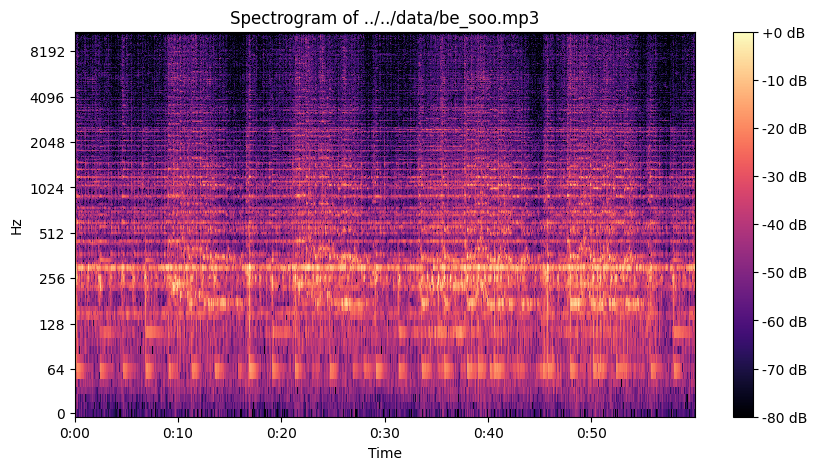

In [3]:
# Load the audio file using librosa
file_path = "../../data/be_soo.mp3"
duration = 60
sample_rate = None

y, sr = librosa.load(file_path, duration=duration)

# Generate the spectrogram
D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)

# Display the spectrogram
plt.figure(figsize=(10, 5))
librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram of ' + file_path)

plt.show()

In [4]:
sr / 25

882.0

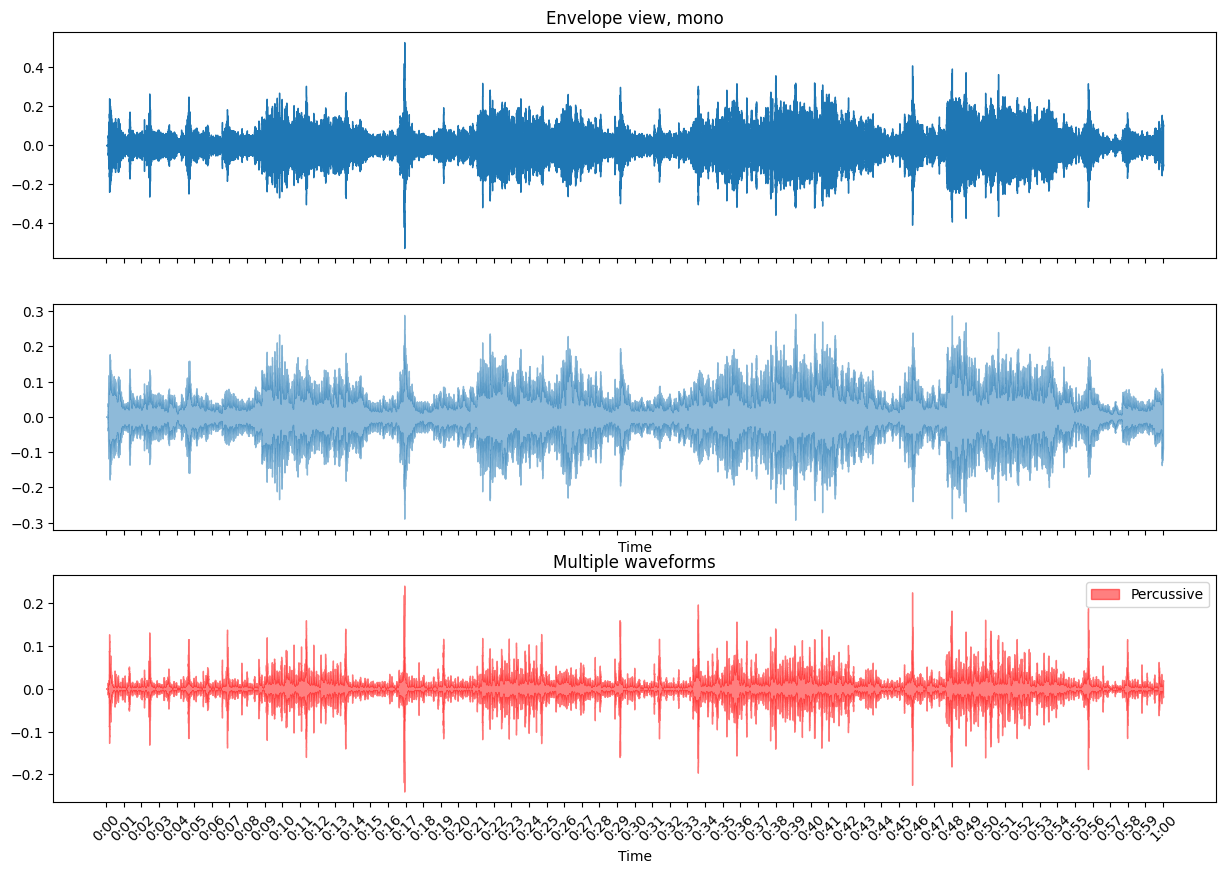

In [5]:
y, sr = librosa.load(file_path, duration=duration)
fig, ax = plt.subplots(nrows=3, sharex=True, figsize=(15, 10))
librosa.display.waveshow(y, sr=sr, ax=ax[0])
ax[0].set(title='Envelope view, mono')
ax[0].label_outer()

y, sr = librosa.load(file_path, duration=duration)
y_harm, y_perc = librosa.effects.hpss(y)
librosa.display.waveshow(y_harm, sr=sr, alpha=0.5, ax=ax[1], label='Harmonic')
librosa.display.waveshow(y_perc, sr=sr, color='r', alpha=0.5, ax=ax[2], label='Percussive')

# Increase the detail on the x-axis
x_ticks = np.arange(0, duration + 1, 1)  # Adjust this for finer or coarser ticks (1 second intervals)
ax[2].set_xticks(x_ticks)

# Rotate x-axis labels
plt.xticks(rotation=45)

ax[2].set(title='Multiple waveforms')
ax[2].legend()

In [35]:
adj_val = 0
back_rate = 0.01
new_vals = []

for val in y_perc:
    if val > 0:
        adj_val += val
    adj_val -= back_rate
    if adj_val < 0:
        adj_val = 0
    new_vals.append(adj_val)

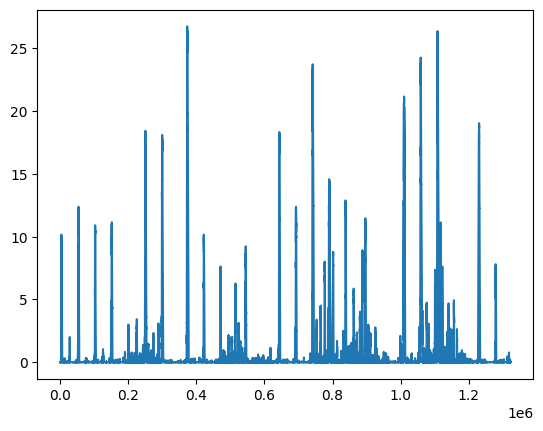

In [36]:
plt.plot(new_vals)

In [43]:
new_vals_compressed = []
window_size = 44100 // 60
i = 0
while i < len(new_vals):
    val = max(new_vals[i:i+window_size])
    new_vals_compressed.append(val)
    i += window_size

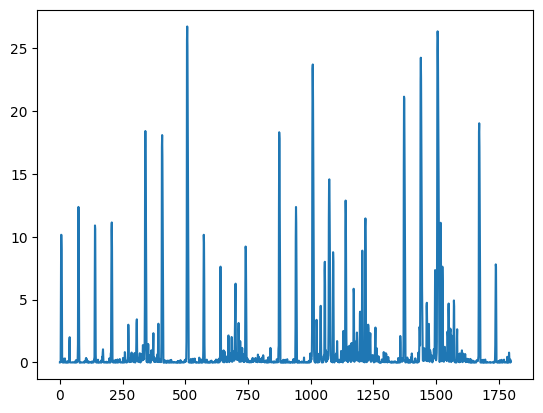

In [44]:
plt.plot(new_vals_compressed)

In [45]:
len(new_vals_compressed)

1800

In [20]:
1323000 / 22050

60.0

In [18]:
y_perc

array([3.2213579e-12, 1.7101894e-10, 7.3128315e-10, ..., 1.1718064e-02,
       1.0561033e-02, 1.7875783e-02], dtype=float32)